## Consignment Analysis - Problem 6 - Applied Materials by Tanmay Ghosh

In [2]:
#Importing necessary libraries
import pandas as pd
import ipywidgets as widgets

In [5]:
#Pulling in dataset andd changing some column names for feasibility
consignment = pd.read_csv('consignment details.csv')
consignment.rename(columns={'total part_Weight (in kgs)': 'total_weight',
                            'Packet_Cost (in INR)': 'pkt_cost',
                            'Shipment_DateTime': 'ship_date'}, inplace=True)
consignment.head()

,row id,Consignment_ID,Packet_ID,Part_ID,Total_Parts,total_weight,pkt_cost,ship_date
0,1,CN_19520_1,7703851,6746,36,3.214790,510.953262,6/12/2023 14:25
1,2,CN_19520_1,7703851,62555,37,6.764561,510.953262,6/11/2023 15:33
2,3,CN_19520_1,7703851,46435,17,6.347278,510.953262,6/12/2023 8:29
3,4,CN_19520_1,7703851,67150,26,7.826136,510.953262,6/12/2023 10:14
4,5,CN_19520_1,7703851,15180,24,4.730917,510.953262,6/12/2023 5:29


## Unique Packets per consignment

In [8]:
#Q1 Answer
con_unique = pd.DataFrame(consignment.groupby('Consignment_ID')['Packet_ID'].unique()).reset_index()
con_unique['Count of unique packets'] = con_unique['Packet_ID'].apply(len)
con_unique.head()

,Consignment_ID,Packet_ID,Count of unique packets
0,CN_19431_1,"[4836466, 4709476, 2912863, 5922982]",4
1,CN_19431_10,"[4358469, 4557932]",2
2,CN_19431_11,"[6626650, 2629233]",2
3,CN_19431_2,[4333161],1
4,CN_19431_3,"[4388214, 5595636, 7140837, 5140527, 414374]",5


## Unique parts per packet per consignment

In [9]:
#Q2 Answer
unique_parts_per_packet_per_consignment = consignment.groupby(['Consignment_ID', 
'Packet_ID']).agg(Count_unique_parts_per_packet=('Part_ID', 
'nunique')).reset_index()
unique_parts_per_packet_per_consignment.head()


,Consignment_ID,Packet_ID,Count_unique_parts_per_packet
0,CN_19431_1,2912863,6
1,CN_19431_1,4709476,8
2,CN_19431_1,4836466,2
3,CN_19431_1,5922982,10
4,CN_19431_10,4358469,7


## Total weight per consignment

In [10]:
# Q3 answer
total_weight_per_consignment = consignment.groupby('Consignment_ID')['total_weight'].sum().reset_index().round(2).astype(str) + ' KG'
total_weight_per_consignment.head()

,Consignment_ID,total_weight
0,CN_19431_1 KG,134.82 KG
1,CN_19431_10 KG,64.56 KG
2,CN_19431_11 KG,68.1 KG
3,CN_19431_2 KG,51.16 KG
4,CN_19431_3 KG,92.23 KG


## Cost/part within each consignment

In [11]:
#Q4 answer
cost_per_part_within_consignment = consignment.groupby(['Consignment_ID', 
 'Packet_ID']).apply(lambda x: x['pkt_cost'].sum() / x['Part_ID'].nunique()).reset_index(name='Cost_per_part')
cost_per_part_within_consignment['Cost_per_part'] = cost_per_part_within_consignment['Cost_per_part'].round(2).astype(str) + ' INR'
cost_per_part_within_consignment.head()

,Consignment_ID,Packet_ID,Cost_per_part
0,CN_19431_1,2912863,344.82 INR
1,CN_19431_1,4709476,323.25 INR
2,CN_19431_1,4836466,287.07 INR
3,CN_19431_1,5922982,809.83 INR
4,CN_19431_10,4358469,971.61 INR


## Total shipments per day and pivot and plot analysis

    ship_date  Total_shipments
0  2023-06-11             1327
1  2023-06-12             1355


<AxesSubplot:xlabel='ship_date'>

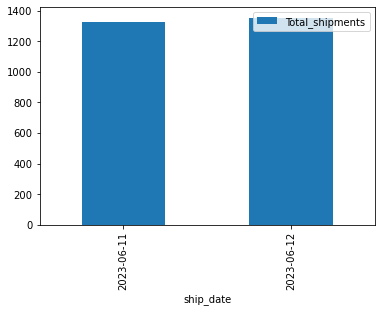

In [12]:
# Q5 Answer
consignment['ship_date'] = pd.to_datetime(consignment['ship_date']).dt.date
total_shipments_per_day = consignment.groupby('ship_date').apply(lambda x: x['Consignment_ID'].nunique()).reset_index(name='Total_shipments')
print(total_shipments_per_day.head())
total_shipments_per_day.plot(kind='bar', x='ship_date', y='Total_shipments')


In [17]:
pivot_table = pd.pivot_table(consignment, 
                             values='pkt_cost', 
                             index='Consignment_ID', 
                             columns='ship_date', 
                             aggfunc='sum').reset_index()
display(pivot_table)

ship_date,Consignment_ID,2023-06-11,2023-06-12
0,CN_19431_1,5349.091251,7978.202156
1,CN_19431_10,2582.168811,8052.815037
2,CN_19431_11,3161.760516,5719.058721
3,CN_19431_2,1555.457189,6221.828754
4,CN_19431_3,2755.483656,6956.437342
...,...,...,...
1356,CN_19520_5,8392.733058,15941.467960
1357,CN_19520_6,3452.195299,6927.930812
1358,CN_19520_7,6723.194326,7061.572714
1359,CN_19520_8,1120.805825,2241.611650
